# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
# Tampilkan 5 baris pertama dengan function head.
# Load Dataset
url= "https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m"
df = pd.read_csv(url)  
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [3]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

*Insight Data df.info( :*)
- Dataset terdiri dari 2.537 baris dan 16 kolom, ukuran data yang cukup besar untuk analisis dan pemodelan.
- Terdapat 5 kolom bertipe numerik (float64) yang mencakup fitur penting seperti TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, dan AccountBalance.


In [4]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


**Insight** : 
- Dataset memiliki 5 kolom numerik utama yang dianalisis, yaitu:
TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, dan AccountBalance.

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

*Pada tahap Exploratory Data Analysis (EDA) untuk memahami karakteristik dataset. EDA bertujuan untuk :*
- Memahami Struktur Data
    - Meninjau jumlah baris dan kolom pada dataset untuk mengetahui ukuran data.  
    - Melihat tipe data setiap kolom, apakah numerik atau kategorikal.

- Menangani Data yang Hilang
    - Mengidentifikasi jumlah missing values pada tiap kolom.  
    - Menentukan apakah diperlukan langkah penanganan missing values, seperti imputasi atau penghapusan data.

- Visualisasi Awal
    - Menyiapkan visualisasi distribusi data numerik agar bisa mengenali pola sebaran, outlier, dan karakteristik lainnya.

In [5]:
# Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Basic & Skilled]

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set opsi tampilan agar rapi ke bawah
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

# 1. Menampilkan dimensi dataset
print("Jumlah baris dan kolom:", df.shape)

# 2. Menampilkan Dataset
print("\nMenampilkan Dataset:")
print(df.head().to_string())   # tampil full, format tabel ke bawah rapi

# 3. Menampilkan informasi struktur dan tipe data
print("\nInformasi Struktur Dataset:")
df.info()

# 4. Menampilkan jumlah missing value per kolom (hanya kolom yang ada missing value > 0)
print("\nJumlah Missing Value per Kolom (hanya yang > 0):")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

# Agar tabel lebih rapi:
missing_df = missing_values.reset_index()
missing_df.columns = ['Kolom', 'Jumlah Missing']
print("\nTabel Missing Value:")
print(missing_df.to_string(index=False))

# 5. Statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif Kolom Numerik:")
print(df.describe())

# 6. Menentukan kolom numerik dan kategorikal
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
kategorikal_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nKolom Numerik:")
print(numerik_cols)

print("\nKolom Kategorikal:")
print(kategorikal_cols)


Jumlah baris dan kolom: (2537, 16)

Menampilkan Dataset:
  TransactionID AccountID  TransactionAmount      TransactionDate TransactionType   Location DeviceID      IP Address MerchantID Channel  CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance PreviousTransactionDate
0      TX000001   AC00128              14.09  2023-04-11 16:29:14           Debit  San Diego  D000380  162.198.218.92       M015     ATM         70.0             Doctor                 81.0            1.0         5112.21     2024-11-04 08:08:08
1      TX000002   AC00455             376.24  2023-06-27 16:44:19           Debit    Houston  D000051     13.149.61.4       M052     ATM         68.0             Doctor                141.0            1.0        13758.91     2024-11-04 08:09:35
2      TX000003   AC00019             126.29  2023-07-10 18:16:08           Debit       Mesa  D000235  215.97.143.157       M009  Online         19.0            Student                 56.0            1.0    

*Insight dari Exploratory Data Analysis Awal*
1. Struktur Data :
- Dataset terdiri dari 2.537 baris dan 16 kolom. Tipe data mencakup kombinasi antara:
    - Numerik: 5 kolom (tipe float64) seperti TransactionAmount, CustomerAge, AccountBalance.
    - Kategorikal/Teks: 11 kolom (tipe object) seperti TransactionID, TransactionType, Location, dll.
2. Kualitas Data (Missing Values)
- Terdapat missing values di hampir semua kolom, terutama:
    - TransactionID (29 nilai hilang)
    - TransactionType, Location, DeviceID (masing-masing 30 nilai hilang)
    - CustomerOccupation (23 nilai hilang)
    - PreviousTransactionDate (24 nilai hilang) Ini menunjukkan bahwa proses pembersihan data (seperti imputasi atau penghapusan baris/kolom tertentu) perlu dilakukan sebelum membangun model.

**Tujuan dari analisis korelasi antar fitur:**
- Mengidentifikasi fitur yang memiliki hubungan kuat, yang bisa membantu dalam pemilihan fitur (feature selection).
- Mengetahui kemungkinan terjadinya multikolinearitas (korelasi tinggi antar fitur), yang bisa memengaruhi performa model prediktif tertentu.

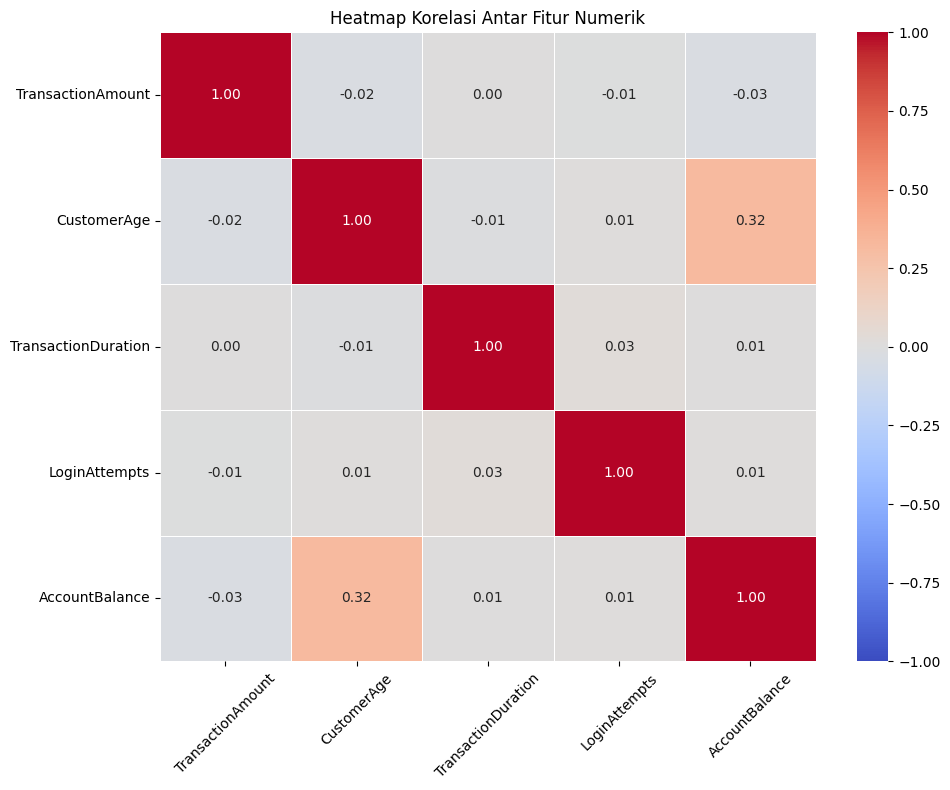

In [6]:
# (Opsional) Menampilkan Korelasi Antar Fitur [Skilled 1]

import matplotlib.pyplot as plt
import seaborn as sns

# Memastikan kolom numerik terdefinisi dengan baik
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Cluster', errors='ignore')

# Imputasi nilai NaN dengan rata-rata (jika belum dilakukan)
numerik_df = df[numerik_cols].fillna(df[numerik_cols].mean())

# Hitung matriks korelasi
corr_matrix = numerik_df.corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


*Insight korelasi antar fitur :*
- Tidak ditemukan multikolinearitas ekstrem antar fitur numerik.

**Visualisasi Distribusi Fitur Numerik (Histogram) :**
- Visualisasi histogram digunakan untuk memahami sebaran nilai dari setiap fitur numerik dalam dataset.

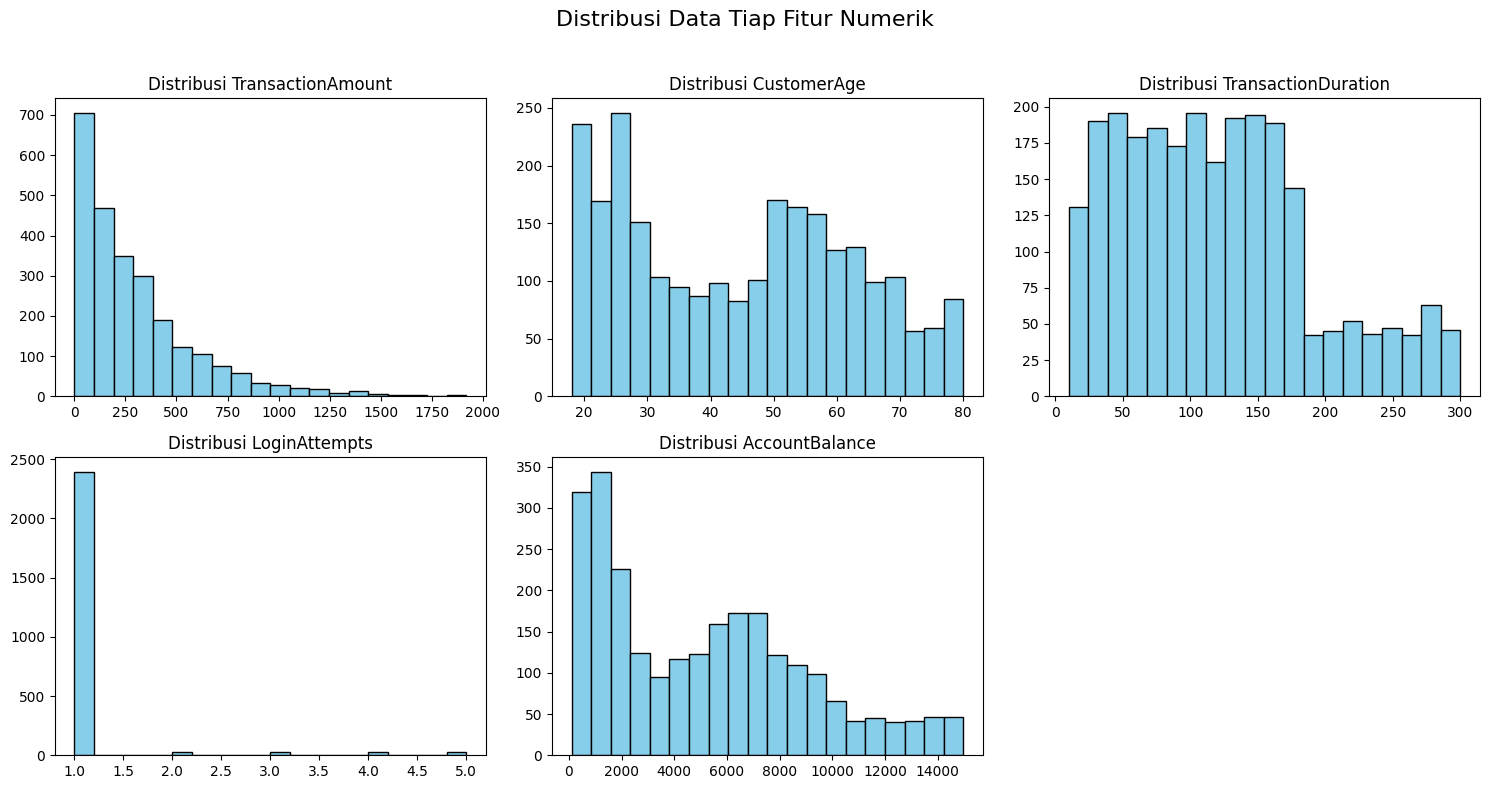

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

import matplotlib.pyplot as plt

# Ambil kolom numerik saja
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Buat grid subplot yang pas 
n_cols = 3
n_rows = (len(numerik_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # Biar lebih gampang iterasi

for i, col in enumerate(numerik_cols):
    ax = axes[i]
    df[col].hist(bins=20, color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(f'Distribusi {col}')
    ax.grid(False)

# Hilangkan subplot yang kosong kalau ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribusi Data Tiap Fitur Numerik", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


*Insight dari Histogram Fitur Numerik :*
- TransactionAmount dan AccountBalance cenderung memiliki distribusi yang skew (miring ke kanan), menunjukkan banyak nilai kecil dan sedikit nilai besar. Ini umum terjadi pada data keuangan, di mana sebagian besar transaksi bernilai kecil sementara hanya sedikit yang bernilai sangat besar.
- CustomerAge, data berdistribusi multimodal atau memiliki beberapa puncak pada rentang usia tertentu.
- TransactionDuration  berdistribusi uniform (seragam), Ini mengindikasikan bahwa ada berbagai jenis proses transaksi, dari yang cepat hingga yang memakan waktu lebih lama.
- LoginAttempts berdistribusi right-skewed.

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

*Visualisasi lanjutan (Advanced EDA) agar mendapatkan pemahaman yang lebih dalam terhadap fitur numerik pada dataset.*

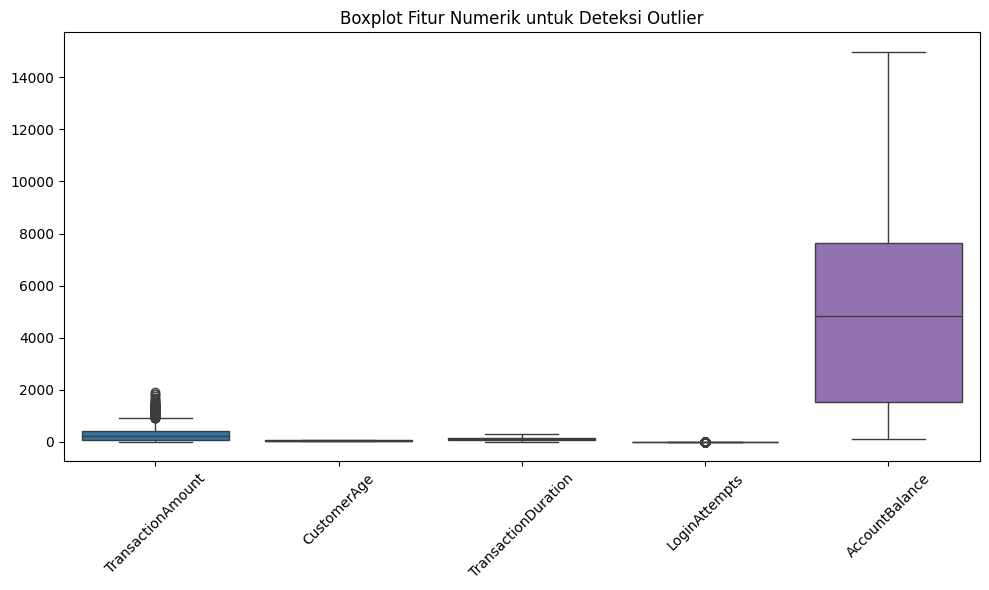

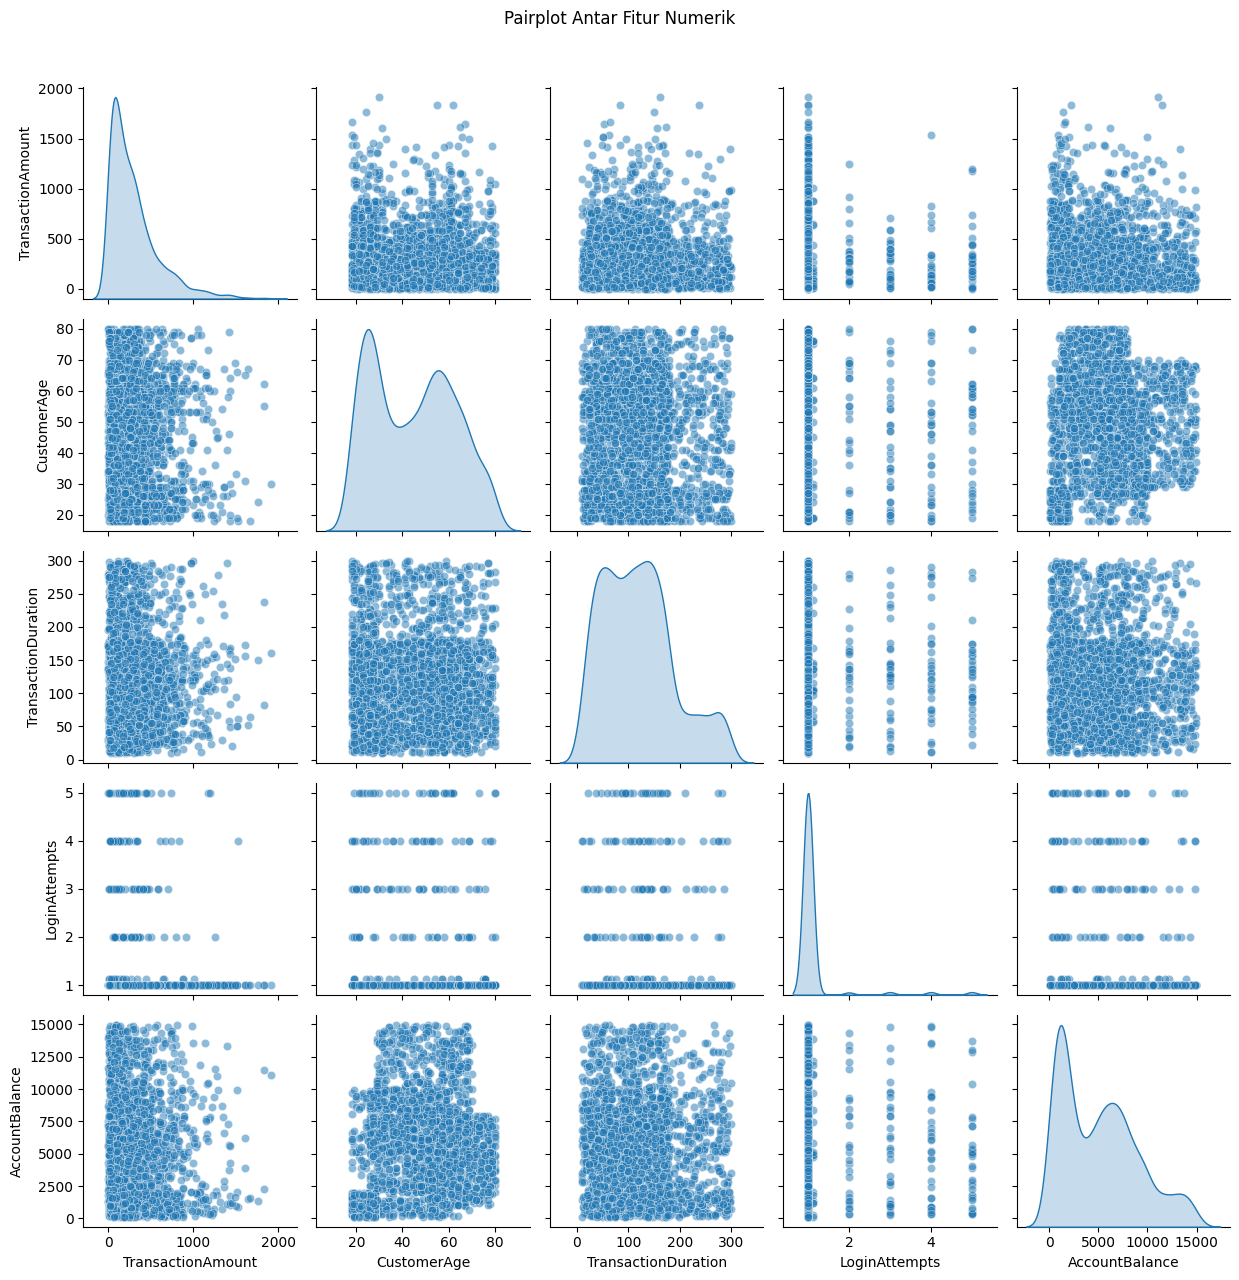

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Boxplot untuk deteksi outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerik_df)
plt.title('Boxplot Fitur Numerik untuk Deteksi Outlier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Pairplot untuk melihat hubungan antar fitur
pairplot = sns.pairplot(numerik_df, diag_kind='kde', plot_kws={'alpha':0.5})
pairplot.fig.suptitle("Pairplot Antar Fitur Numerik", y=1.02)  # cara tepat memberi judul pairplot
plt.tight_layout()
plt.show()


*- Visualisasi lanjutan ini memberikan pandangan lebih menyeluruh terhadap struktur data, pola, dan potensi masalah (seperti outlier dan korelasi tinggi). Ini penting sebagai bagian dari pra-pemodelan agar model yang dibangun nantinya memiliki performa yang optimal.*

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
# Mengecek jumlah missing value per kolom
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

Jumlah missing value per kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


*Insight :*
- Tingkat Kehilangan Data 
    - Kolom dengan jumlah missing tertinggi adalah TransactionType, Location, dan DeviceID masing-masing dengan 30 data hilang.
    - Kolom lainnya memiliki missing value berkisar antara 18–29 data.
- Persentase Kehilangan
    - Semua kolom yang memiliki missing value berada dalam rentang <2% dari total data (maksimum 30/2537 ≈ 1.18%).

In [10]:
# Mengecek dataset menggunakan duplicated().sum()
print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah data duplikat:
21


*Insight :* 
- Terdapat 21 data duplikat 

**Menanggani Duplikat Data**

In [11]:
# Menghapus data duplikat
df = df.drop_duplicates()
print("Jumlah data setelah menghapus duplikat:", df.shape)

Jumlah data setelah menghapus duplikat: (2516, 16)


*Insight :*
- Data duplikat berhasil dihapus, menghasilkan dataset yang unik dan bebas pengulangan, sehingga kualitas model menjadi lebih baik.

**Menanggani Missing Value**

In [12]:
# Pisahkan kolom numerik dan kategorikal
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns
kategorikal_cols = df.select_dtypes(include=['object']).columns

# Imputasi missing value pada kolom numerik dengan mean
df[numerik_cols] = df[numerik_cols].fillna(df[numerik_cols].mean())

# Imputasi missing value pada kolom kategorikal dengan modus
for col in kategorikal_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Cek kembali missing value setelah imputasi
print("\nJumlah missing value per kolom setelah imputasi:")
print(df.isnull().sum())



Jumlah missing value per kolom setelah imputasi:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


*Insight:*
- Tidak ada lagi data yang hilang, data aman untuk di proses.

In [13]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df.drop(columns=[
    'TransactionID',
    'AccountID',
    'DeviceID',
    'MerchantID',
    'IP Address'
], inplace=True)


*Langkah-langkah Encoding Fitur Kategorikal :*
- Memilih semua kolom bertipe kategorikal (object).
- Mengonversi setiap nilai kategorikal menjadi string (untuk mencegah error).
- Menerapkan LabelEncoder secara iteratif ke setiap kolom.

In [14]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melakukan encoding.

from sklearn.preprocessing import LabelEncoder

# Pilih kolom kategorikal (tipe object)
kategorikal_cols = df.select_dtypes(include=['object']).columns

# Inisialisasi encoder
le = LabelEncoder()

# Loop encoding setiap kolom kategorikal
for col in kategorikal_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # pastikan tipe string agar tidak error

# Tampilkan 5 baris pertama setelah encoding
print(df.head())


   TransactionAmount  TransactionDate  TransactionType  Location  Channel  CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  PreviousTransactionDate
0              14.09              680                1        36        0    70.000000                   0                 81.0            1.0         5112.21                      105
1             376.24             1178                1        15        0    68.000000                   0                141.0            1.0        13758.91                      192
2             126.29             1262                1        23        2    19.000000                   3                 56.0            1.0         1122.35                       41
3             184.50              818                1        33        2    26.000000                   3                 25.0            1.0         8569.06                      163
4              13.45             1939                0         1        2    44.

*Insight Hasil Transformasi Data:*
- Fitur Kategorikal Telah Dikonversi ke Bentuk Numerik
    - Kolom-kolom bertipe objek seperti TransactionType, Location, Channel, CustomerOccupation, dan PreviousTransactionDate telah berhasil dikonversi menjadi nilai numerik menggunakan LabelEncoder().

**- Lakukan normalisasi fitur numerik menggunakan MinMaxScaler agar semua nilai berada dalam rentang 0 hingga 1, sehingga model dapat belajar dengan lebih optimal.**

In [15]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

from sklearn.preprocessing import MinMaxScaler

# Pilih kolom numerik
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Inisialisasi scaler
scaler = MinMaxScaler()
df[numerik_cols] = scaler.fit_transform(df[numerik_cols])

# Tampilkan 5 baris pertama hasil scaling
print(df[numerik_cols].head())


   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  AccountBalance
0           0.007207     0.838710             0.244828            0.0        0.336832
1           0.195940     0.806452             0.451724            0.0        0.918055
2           0.065680     0.016129             0.158621            0.0        0.068637
3           0.096016     0.129032             0.051724            0.0        0.569198
4           0.006874     0.429757             0.648276            0.0        0.492591


**insight dari hasil scaling MinMax :**
1. Semua nilai fitur numerik sudah diskalakan.
    - Ini memudahkan algoritma machine learning agar fitur-fitur tersebut sebanding dalam skala yang sama.

2. Distribusi nilai yang sudah diskalakan:
    - TransactionAmount memiliki nilai 0.01 menunjukkan transaksi yang relatif kecil dibandingkan transaksi lainnya dalam dataset.
    - AccountBalance mencapai 0.91 pada salah satu baris, menandakan saldo yang sangat tinggi dibanding akun-akun lainnya.
    - CustomerAge dan TransactionDuration kini berada dalam skala proporsional yang memungkinkan model menangkap pola tanpa bias skala angka.



In [16]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

df.columns.tolist()


['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

In [17]:
print(df.columns.tolist())


['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']


*Insight :*
- Beberapa data ID telah berhasil dihapus, sehingga output yang keluar seperti diatas.

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

**Langkah-langkah yang dilakukan :**
- Menghitung batas bawah dan atas (lower & upper bound) berdasarkan IQR untuk setiap kolom numerik.
- Jika nilai outlier pada kolom yang kurang dari 20, maka baris dengan nilai outlier tersebut akan dihapus (drop).
- Jika jumlah outlier pada kolom lebih dari atau sama dengan 20, maka dilakukan capping (winsorizing), yaitu mengganti nilai ekstrem dengan batas bawah atau atas IQR.


In [18]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

import pandas as pd
import numpy as np

# Copy data numerik biar aman
df_outlier = numerik_df.copy()

# Fungsi hitung outlier per kolom berdasarkan IQR
def detect_outliers_iqr(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (col < lower_bound) | (col > upper_bound), lower_bound, upper_bound

# Threshold jumlah outlier untuk memutuskan drop atau capping
threshold = 20

# Simpan index baris yang outlier untuk drop
rows_to_drop = set()

# Loop tiap kolom numerik
for col in df_outlier.columns:
    outlier_mask, lower, upper = detect_outliers_iqr(df_outlier[col])
    n_outliers = outlier_mask.sum()
    print(f"Kolom '{col}' punya {n_outliers} outlier.")
    
    if n_outliers == 0:
        continue  # tidak ada outlier, lanjut
    
    if n_outliers < threshold:
        # Kalo sedikit, kumpulkan index baris outlier untuk nanti di-drop
        outlier_indices = df_outlier.index[outlier_mask].tolist()
        rows_to_drop.update(outlier_indices)
        print(f"  Drop {n_outliers} baris outlier di kolom '{col}'")
    else:
        # Kalo banyak, lakukan capping (winsorizing)
        print(f"  Lakukan capping outlier di kolom '{col}'")
        df_outlier.loc[df_outlier[col] < lower, col] = lower
        df_outlier.loc[df_outlier[col] > upper, col] = upper

# Drop semua baris outlier yang sudah terkumpul
print(f"\nTotal baris yang akan di-drop karena outlier: {len(rows_to_drop)}")
df_outlier_cleaned = df_outlier.drop(index=rows_to_drop).reset_index(drop=True)

print(f"\nJumlah data sebelum pembersihan outlier: {numerik_df.shape}")
print(f"Jumlah data setelah pembersihan outlier: {df_outlier_cleaned.shape}")

# Update numerik_df dengan data bersih outlier
numerik_df = df_outlier_cleaned


Kolom 'TransactionAmount' punya 114 outlier.
  Lakukan capping outlier di kolom 'TransactionAmount'
Kolom 'CustomerAge' punya 0 outlier.
Kolom 'TransactionDuration' punya 0 outlier.
Kolom 'LoginAttempts' punya 141 outlier.
  Lakukan capping outlier di kolom 'LoginAttempts'
Kolom 'AccountBalance' punya 0 outlier.

Total baris yang akan di-drop karena outlier: 0

Jumlah data sebelum pembersihan outlier: (2537, 5)
Jumlah data setelah pembersihan outlier: (2537, 5)


*Insight :*
1. Outlier terdeteksi pada dua kolom numerik:
    - 'TransactionAmount' memiliki 114 outlier,
    - 'LoginAttempts' memiliki 141 outlier.
2. Tidak ada kolom yang di-drop barisnya, karena semua outlier ditangani dengan capping, bukan penghapusan.

**Langkah selanjutnya meLakukan binning (pengelompokan nilai) pada fitur numerik TransactionAmount dan CustomerAge ke dalam beberapa kategori, lalu gunakan LabelEncoder untuk mengubah kategori tersebut menjadi nilai numerik.**

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Binning pada kolom 'TransactionAmount' (nilai sudah antara 0 dan 1)
bins_amount = [-0.01, 0.1, 0.3, 0.6, 1.01]  # rentang bins harus monotonik naik
labels_amount = ['Very Low', 'Low', 'Medium', 'High']
df['TransactionAmount_binned'] = pd.cut(df['TransactionAmount'], bins=bins_amount, labels=labels_amount)

# Binning pada kolom 'CustomerAge' (nilai sudah antara 0 dan 1)
bins_age = [-0.01, 0.2, 0.4, 0.6, 1.01]
labels_age = ['Young', 'Adult', 'Middle Age', 'Senior']
df['CustomerAge_binned'] = pd.cut(df['CustomerAge'], bins=bins_age, labels=labels_age)

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Encode hasil binning
df['TransactionAmount_binned_encoded'] = le.fit_transform(df['TransactionAmount_binned'].astype(str))
df['CustomerAge_binned_encoded'] = le.fit_transform(df['CustomerAge_binned'].astype(str))

# Tampilkan hasil binning dan encoding
print(df[['TransactionAmount', 'TransactionAmount_binned', 'TransactionAmount_binned_encoded']].head())
print(df[['CustomerAge', 'CustomerAge_binned', 'CustomerAge_binned_encoded']].head())


   TransactionAmount TransactionAmount_binned  TransactionAmount_binned_encoded
0           0.007207                 Very Low                                 3
1           0.195940                      Low                                 1
2           0.065680                 Very Low                                 3
3           0.096016                 Very Low                                 3
4           0.006874                 Very Low                                 3
   CustomerAge CustomerAge_binned  CustomerAge_binned_encoded
0     0.838710             Senior                           2
1     0.806452             Senior                           2
2     0.016129              Young                           3
3     0.129032              Young                           3
4     0.429757         Middle Age                           1


*Insight Binning dan Encoding::*
- Kolom TransactionAmount telah berhasil dibagi ke dalam empat kategori: Very Low, Low, Medium, dan High menggunakan teknik binning, berdasarkan nilai numerik antara 0 dan 1. Kemudian, kategori ini telah diencode ke dalam bentuk numerik menggunakan LabelEncoder.
- Hal yang sama dilakukan pada kolom CustomerAge, yang dibagi menjadi kategori Young, Adult, Middle Age, dan Senior, lalu juga diencode.

**Langkah selanjutnya visualisasikan distribusi kategori dari hasil binning TransactionAmount dan CustomerAge menggunakan countplot dari Seaborn untuk memahami persebaran data pada masing-masing kategori.**

C:\Users\ADVAN\AppData\Local\Temp\ipykernel_11176\2102107014.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TransactionAmount_binned', data=df, palette='pastel',
C:\Users\ADVAN\AppData\Local\Temp\ipykernel_11176\2102107014.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CustomerAge_binned', data=df, palette='pastel',


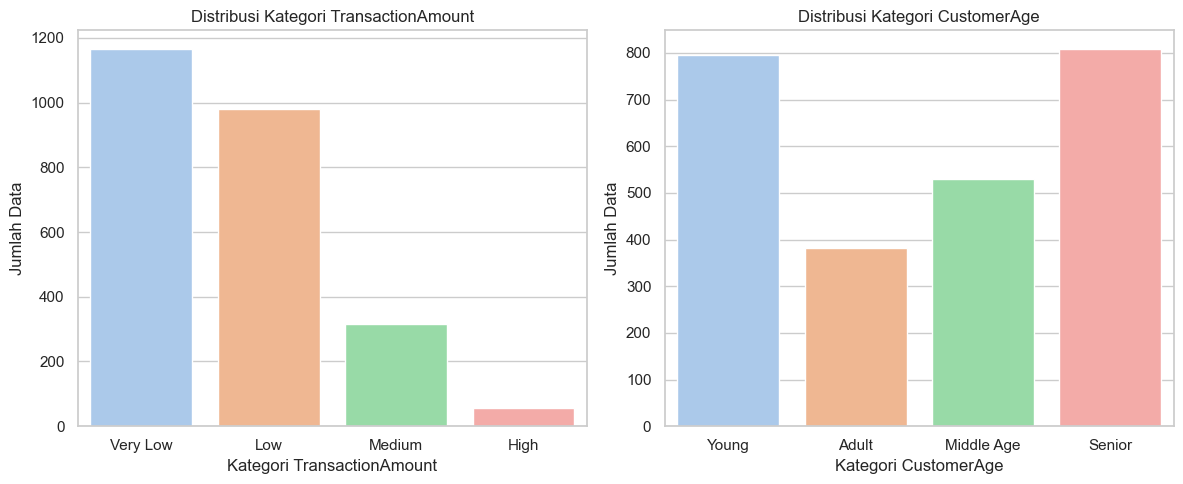

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style seaborn
sns.set(style="whitegrid")

# Plot distribusi TransactionAmount_binned
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='TransactionAmount_binned', data=df, palette='pastel',
              order=['Very Low', 'Low', 'Medium', 'High'])
plt.title('Distribusi Kategori TransactionAmount')
plt.xlabel('Kategori TransactionAmount')
plt.ylabel('Jumlah Data')

# Plot distribusi CustomerAge_binned
plt.subplot(1,2,2)
sns.countplot(x='CustomerAge_binned', data=df, palette='pastel',
              order=['Young', 'Adult', 'Middle Age', 'Senior'])
plt.title('Distribusi Kategori CustomerAge')
plt.xlabel('Kategori CustomerAge')
plt.ylabel('Jumlah Data')

plt.tight_layout()
plt.show()


**Insight dari Binning dan Distribusi Kategori :**
- Nilai TransactionAmount berhasil diklasifikasikan ke dalam kategori: Very Low, Low, Medium, dan High. Mayoritas data awal masuk kategori Very Low, yang menunjukkan banyak transaksi bernilai kecil.
- Nilai CustomerAge dibagi menjadi Young, Adult, Middle Age, dan Senior, di mana data menunjukkan sebagian besar pengguna termasuk kategori Senior dan Young, mengindikasikan rentang usia pengguna cukup tersebar luas.


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [29]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df.describe()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_binned_encoded,CustomerAge_binned_encoded,Cluster
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,0.155031,1233.545707,0.776232,20.931240,0.989269,0.429757,1.521463,0.377745,0.030661,0.337188,179.095787,2.030207,1.800874,0.961844
std,0.151634,718.130032,0.416851,12.193293,0.804241,0.286366,1.134291,0.240074,0.148591,0.260579,102.446793,0.969045,1.047052,0.843720
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043191,599.750000,1.000000,11.000000,0.000000,0.145161,0.750000,0.182759,0.000000,0.095325,91.000000,1.000000,1.000000,0.000000
50%,0.111121,1227.500000,1.000000,21.000000,1.000000,0.435484,2.000000,0.358621,0.000000,0.318567,178.000000,2.000000,2.000000,1.000000
75%,0.213323,1856.250000,1.000000,31.000000,2.000000,0.661290,3.000000,0.520690,0.000000,0.506814,269.000000,3.000000,3.000000,2.000000
max,1.000000,2484.000000,1.000000,42.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,359.000000,3.000000,3.000000,2.000000


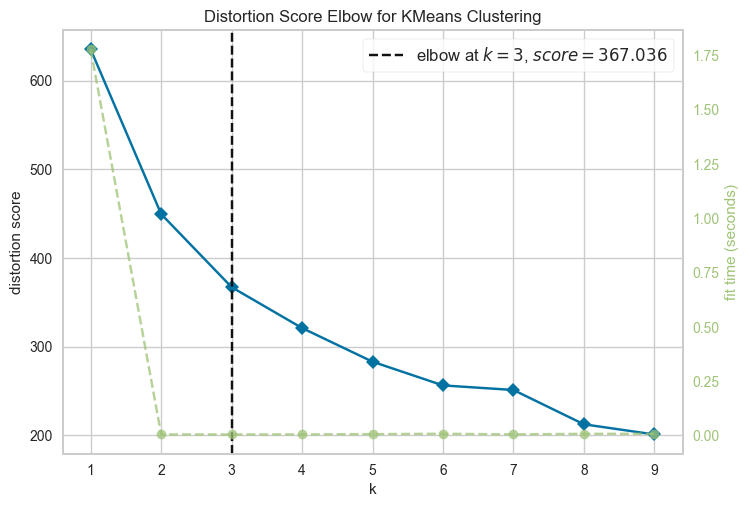

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Inisialisasi model KMeans
model = KMeans(random_state=42)

# Pilih hanya fitur numerik yang tidak redundan
features = df[[
    'TransactionAmount',
    'CustomerAge',
    'TransactionDuration',
    'LoginAttempts',
    'AccountBalance'
]]

# Visualisasi Elbow Method untuk menentukan jumlah cluster terbaik (misal range 1-10)
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(features)  # Fit data ke visualizer
visualizer.show()         # Tampilkan plot


*Insight :*
- Jumlah cluster yang optimal untuk dataset ini adalah 3, berdasarkan titik siku (elbow) pada grafik distortion score.

In [23]:
# Menggunakan algoritma K-Means Clustering

from sklearn.cluster import KMeans

# Misalnya hasil dari Elbow Method menunjukkan jumlah cluster optimal adalah 3
n_clusters = 3

# Inisialisasi dan latih model KMeans
model_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
model_kmeans.fit(features)

# Tambahkan hasil cluster ke DataFrame
df['Cluster'] = model_kmeans.labels_

# Tampilkan hasil cluster pertama
print(df[['Cluster']].value_counts())


Cluster
0          945
2          849
1          722
Name: count, dtype: int64


*Insight :*
- Data terbagi cukup merata ke dalam tiga cluster 

Jalankan cell code ini untuk menyimpan model kamu.

In [24]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")


import joblib
joblib.dump(model_kmeans, "model_clustering.h5")


['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [25]:
# Menghitung dan menampilkan nilai Silhouette Score.

from sklearn.metrics import silhouette_score

# Menghitung silhouette score
score = silhouette_score(features, model_kmeans.labels_)

# Tampilkan nilai silhouette score
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.2789


**Insight Tambahan :**
- Model KMeans dengan 3 cluster berhasil membagi data menjadi kelompok yang cukup terpisah dengan silhouette score > 0.2
- Distribusi jumlah data per cluster cukup merata, tidak ada cluster yang terlalu kecil atau terlalu besar sehingga model tidak terlalu bias ke satu kelompok saja.

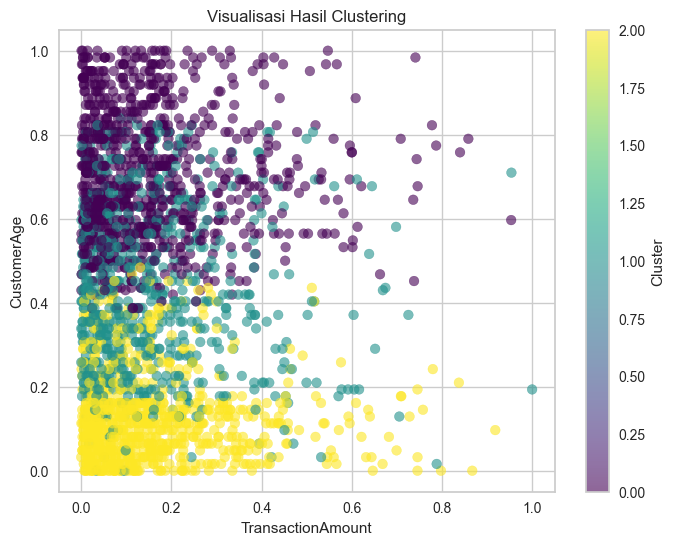

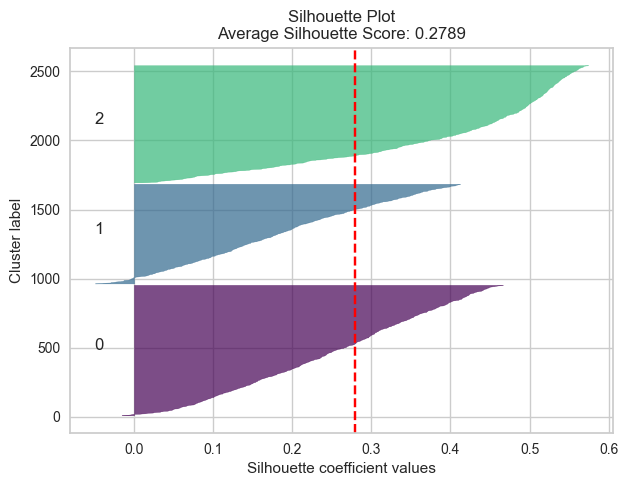

In [26]:
# Membuat visualisasi hasil clustering

import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# Load model yang sudah disimpan
model_kmeans = joblib.load("model_clustering.h5")

# Pastikan df dan numerik_cols sama dengan yang kita pakai saat training model
features = df[numerik_cols].values  # Fitur numerik hasil scaling

# Ambil label cluster dari model
labels = model_kmeans.labels_

# --- Visualisasi Scatter Plot 2 fitur pertama ---
plt.figure(figsize=(8,6))
scatter = plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel(numerik_cols[0])
plt.ylabel(numerik_cols[1])
plt.title("Visualisasi Hasil Clustering")
plt.colorbar(scatter, label='Cluster')
plt.show()

# --- Visualisasi Silhouette Manual ---
silhouette_vals = silhouette_samples(features, labels)
n_clusters = model_kmeans.n_clusters
y_lower = 10

plt.figure(figsize=(7, 5))
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster

    color = plt.cm.viridis(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + size_cluster / 2, str(i))
    y_lower = y_upper + 10

score = silhouette_score(features, labels)
plt.axvline(x=score, color="red", linestyle="--")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.title(f"Silhouette Plot\nAverage Silhouette Score: {score:.4f}")
plt.show()


(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

Explained variance ratio per komponen: [0.39483845 0.22861536]


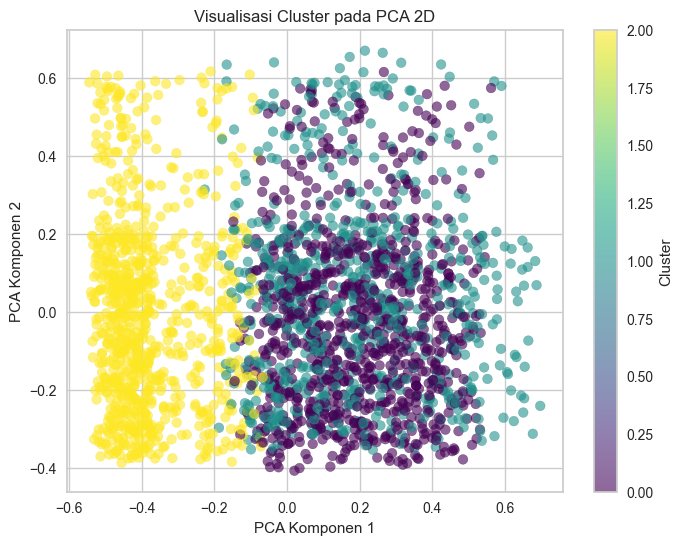

In [27]:
# Membangun model menggunakan PCA.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ambil data numerik dari hasil clustering yang sudah kamu buat
# (pastikan 'Cluster' tidak ikut diolah dalam PCA)
features_for_pca = features.copy()  # features = data numerik sebelum clustering

# PCA untuk reduksi ke 2 komponen
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(features_for_pca)

# Tampilkan rasio variansi yang dijelaskan oleh 2 komponen utama
print(f"Explained variance ratio per komponen: {pca.explained_variance_ratio_}")

# Visualisasi hasil PCA berdasarkan cluster yang sudah ada
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.title('Visualisasi Cluster pada PCA 2D')
plt.colorbar(label='Cluster')
plt.show()




In [28]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

import joblib

# Simpan model PCA ke file
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

  ## **a. Interpretasi Hasil Clustering**
  1. **Interpretasi:**
  - **Cluster 0: (Nasabah Stabil & Bertransaksi Cepat)**:
    - **Rata-rata (mean) TransactionAmount:** 0.1507 (paling rendah di antara cluster)
    - **Rata-rata (mean) LoginAttempts:**  0.0327
    - **Analisis:**
    luster ini didominasi oleh nasabah muda yang sering melakukan login namun hanya melakukan transaksi kecil. Pola ini bisa menunjukkan rasa penasaran atau ketertarikan terhadap layanan digital, tapi belum terbiasa atau percaya untuk bertransaksi dalam jumlah besar.
    Strategi: Berikan edukasi finansial dan promosi layanan pemula seperti tabungan remaja, reward untuk transaksi pertama, atau gamifikasi aplikasi keuangan.



  - **Cluster 1: (Nasabah Stabil & Bertransaksi Cepat)**:
    - **Rata-rata (mean) TransactionAmount:** 0.1582 (tertinggi di antara cluster)
    - **Rata-rata (mean) LoginAttempts:** 0.0327
    - **Analisis:**
    Cluster ini mencerminkan nasabah yang cenderung rutin bertransaksi dengan jumlah relatif tinggi dan memiliki interaksi digital yang sedang. Artinya, mereka stabil dan nyaman dengan platform digital. 
    Strategi: Fokus pada loyalitas dan retensi melalui program point reward, penawaran eksklusif, serta fitur simpanan otomatis dan pengelolaan keuangan pribadi.

  - **Cluster 2: (Nasabah Pasif dengan Daya Beli Sedang)**:
    - **Rata-rata (mean) TransactionAmount:** 0.1564
    - **Rata-rata (mean) LoginAttempts:** 0.0220 (terendah di antara cluster)
    - **Analisis:**
    Nasabah di cluster ini memiliki aktivitas login yang paling sedikit namun nilai transaksi berada di tengah-tengah. Mereka kemungkinan hanya login saat akan melakukan transaksi tertentu saja.
    Strategi: Tingkatkan engagement melalui reminder transaksi rutin, promosi langsung lewat SMS/email, serta penawaran produk seperti deposito, asuransi, atau paket bundling layanan perbankan.


 

In [30]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

# Memilih kolom numerik, kecuali kolom 'Cluster'
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Cluster', errors='ignore')

# Menghitung agregasi statistik per cluster
deskriptif_per_cluster = df.groupby('Cluster')[numerik_cols].agg(['mean', 'min', 'max', 'median', 'std'])

# Menampilkan hasil
print("Analisis Deskriptif Fitur Numerik per Cluster:")
print(deskriptif_per_cluster)



Analisis Deskriptif Fitur Numerik per Cluster:
        TransactionAmount                                         CustomerAge                                         TransactionDuration                                    LoginAttempts                            AccountBalance                                        
                     mean       min       max    median       std        mean       min       max    median       std                mean  min       max    median       std          mean  min  max median       std           mean       min       max    median       std
Cluster                                                                                                                                                                                                                                                                     
0                0.152797  0.000302  0.953561  0.110420  0.150934    0.705124  0.370968  1.000000  0.693548  0.152904            0.362806  0.0  0.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah Tua Potensial Risiko Rendah)**:
  - **Rata-rata TransactionAmount:** 0.152797 
  - **Rata-rata LoginAttempts:** 0.033064
  - **CustomerAge:** 0.705124
  - **AccountBalance:** 0.295597
  - **Analisis:** Pola ini mencerminkan nasabah yang cukup aktif dan berpengalaman, namun mungkin tidak terlalu sering menggunakan layanan digital secara maksimal. Oleh karena itu, strategi yang sesuai untuk segmen ini adalah pendekatan edukatif terkait produk digital, pengingat transaksi berkala, serta program retensi yang dapat mengaktifkan kembali penggunaan layanan.

2. **Cluster 0: (Nasabah Rutin dan Stabil)**:
  - **Rata-rata TransactionAmount:** 0.153021
  - **Rata-rata LoginAttempts:** 0.027652
  - **CustomerAge:** 0.423088
  - **AccountBalance:** 0.657758 (Tinggi)
  - **Analisis:** Nasabah dalam klaster ini menunjukkan bahwa mereka merupakan pengguna yang cenderung stabil dan tidak menunjukkan perilaku mencurigakan. Karakteristik tersebut menjadikan mereka segmen yang ideal untuk program loyalitas, penawaran berkala, atau promosi layanan tambahan yang bersifat jangka panjang.

3. **Cluster 1: (Nasabah Muda dan Transaksi Aktif)**:
  - **Rata-rata TransactionAmount:** 0.159228
  - **Rata-rata LoginAttempts:** 0.030546
  - **CustomerAge:** 0.128924 
  - **AccountBalance:** 0.110865 (Sangat Rendah)
  - **Analisis:**  Mereka termasuk kelompok usia termuda dan memiliki aktivitas login sekitar 3 kali. Hal ini menunjukkan bahwa mereka cukup aktif bertransaksi meskipun nilai saldo masih kecil, kemungkinan besar karena masih dalam tahap awal membangun keuangan. Segmen ini cocok untuk dijangkau melalui program edukasi keuangan, bundling produk terjangkau, atau penawaran berbasis kebutuhan harian.




# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [31]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

# Ubah nama kolom cluster menjadi 'Target'
df.rename(columns={'Cluster': 'Target'}, inplace=True)

In [32]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Muat ulang data asli dari Google Drive (yang belum di-scale)
url = 'https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df_asli = pd.read_csv(url)

# 2. Siapkan fitur numerik
numerik_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# 3. Buat scaler baru dan fit pada data asli
scaler_asli = MinMaxScaler()
scaler_asli.fit(df_asli[numerik_cols])

# 4. Lakukan inverse_transform pada data yang sudah diskalakan
df_inverse = pd.DataFrame(
    scaler_asli.inverse_transform(df[numerik_cols]),
    columns=numerik_cols,
    index=df.index  # penting agar index sama
)

# 5. Tambahkan kolom Target (hasil cluster)
df_inverse['Target'] = df['Target'].values

# 6. Tentukan kolom kategorikal
kategorikal_cols = ['TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']

# 7. Ambil subset df_asli sesuai index df
df_asli.reset_index(drop=True, inplace=True)
df_inverse[kategorikal_cols] = df_asli.iloc[df.index][kategorikal_cols].values

# 8. Agregasi numerik (mean, min, max)
agg_numeric = df_inverse.groupby('Target')[numerik_cols].agg(['mean', 'min', 'max'])

# 9. Agregasi kategorikal (modus)
agg_kategorikal = df_inverse.groupby('Target')[kategorikal_cols].agg(lambda x: x.mode()[0])

# 10. Tampilkan hasil agregasi
print("Agregasi Numerik:")
print(agg_numeric)

print("\nModus Kategorikal:")
print(agg_kategorikal)

# 11. Tampilkan hasil
print(df_inverse.head())


Agregasi Numerik:
       TransactionAmount                CustomerAge             TransactionDuration              LoginAttempts           AccountBalance                       
                    mean   min      max        mean   min   max                mean   min    max          mean  min  max           mean          min       max
Target                                                                                                                                                        
0             293.453791  0.84  1830.00   61.717698  41.0  80.0          115.213667  10.0  299.0      1.132255  1.0  5.0    4498.763000   120.890000  10017.11
1             293.885237  0.32  1919.11   44.231432  18.0  70.0          124.324867  10.0  300.0      1.110607  1.0  5.0    9886.546713  5117.506557  14977.99
2             305.794635  0.26  1762.28   25.993274  18.0  48.0          120.304748  10.0  300.0      1.122186  1.0  5.0    1750.563882   101.250000   7174.69

Modus Kategorikal:
        

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def fit_scalers_per_column(df, numerik_cols):
    scalers = {}
    for col in numerik_cols:
        scaler = MinMaxScaler()
        scaler.fit(df[[col]])
        scalers[col] = scaler
    return scalers

def inverse_transform_summary(summary_stats, numerik_cols, scalers, agg_funcs=['mean', 'min', 'max', 'median', 'std']):
    summary_asli = summary_stats.copy()
    for col in numerik_cols:
        for agg in agg_funcs:
            colname = f"{col}_{agg}"
            if colname in summary_stats.columns:
                values_scaled = summary_stats[colname].values.reshape(-1,1)
                values_asli = scalers[col].inverse_transform(values_scaled).flatten()
                summary_asli[colname] = values_asli
    return summary_asli

# ====== Mulai Penggunaan ======
numerik_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
agg_funcs = ['mean', 'min', 'max', 'median', 'std']

# 1. Fit scaler per kolom dari df asli
scalers = fit_scalers_per_column(df, numerik_cols)

# 2. Buat summary_stats dari df yang sudah diskalakan
summary_stats = df.groupby('Target')[numerik_cols].agg(agg_funcs)
summary_stats.columns = ['_'.join(col) for col in summary_stats.columns]
summary_stats.reset_index(inplace=True)

# 3. Inverse transform ke bentuk asli
summary_asli = inverse_transform_summary(summary_stats, numerik_cols, scalers, agg_funcs)

print(summary_asli)


   Target  TransactionAmount_mean  TransactionAmount_min  TransactionAmount_max  TransactionAmount_median  TransactionAmount_std  CustomerAge_mean  CustomerAge_min  CustomerAge_max  CustomerAge_median  CustomerAge_std  TransactionDuration_mean  TransactionDuration_min  TransactionDuration_max  TransactionDuration_median  TransactionDuration_std  LoginAttempts_mean  LoginAttempts_min  LoginAttempts_max  LoginAttempts_median  LoginAttempts_std  AccountBalance_mean  AccountBalance_min  AccountBalance_max  AccountBalance_median  AccountBalance_std
0       0                0.152797               0.000302               0.953561                  0.110420               0.150934          0.705124         0.370968         1.000000            0.693548         0.152904                  0.362806                      0.0                 0.996552                    0.341379                 0.227212            0.033064                0.0                1.0                   0.0           0.158530     

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Nasabah Lansia dengan Pola Transaksi Stabil dan Konvensional)**:
  - **Rata-rata (mean) TransactionAmount (Asli):** Rp 293.450
  - **Rata-rata (mean) CustomerAge:** 61.72 tahun
  - **Rata-rata (mean) LoginAttempts:** 1.13 kali
  - **Rata-rata (mean) TransactionDuration:** 115.21 detik
  - **Rata-rata (mean) AccountBalance:** Rp 4.498.760
  - **Modus TransactionType:** Debit
  - **Modus Location:** Charlotte
  - **Modus Channel:** ATM
  - **Modus CustomerOccupation:** Retired
  - **Analisis:** Nasabah dalam cluster ini didominasi oleh kelompok usia lanjut yang melakukan transaksi dengan nilai menengah secara rutin. Mereka jarang melakukan login dan cenderung menggunakan channel ATM dengan pola transaksi debit. Saldo rekening relatif stabil. Strategi yang cocok adalah menyediakan layanan konvensional berbasis cabang, edukasi penggunaan digital banking sederhana, serta produk pensiun atau tabungan jangka panjang.

2. **Cluster 1: (Nasabah Dewasa Profesional dengan Saldo Tinggi dan Aktivitas Konsisten)**:
  - **Rata-rata (mean) TransactionAmount (Asli):** Rp 293.890
  - **Rata-rata (mean) CustomerAge:** 44.23 tahun
  - **Rata-rata (mean) LoginAttempts:** 1.11 kali
  - **Rata-rata (mean) TransactionDuration:** 124.32 detik (tertinggi)
  - **Rata-rata (mean) AccountBalance:** Rp 9.886.550 (tertinggi)
  - **Modus TransactionType:** Debit
  - **Modus Location:** San Jose
  - **Modus Channel:** Branch
  - **Modus CustomerOccupation:** Doctor
  - **Analisis:** Cluster ini mencerminkan nasabah dewasa profesional yang memiliki saldo rekening tinggi dan konsisten dalam melakukan transaksi dengan durasi panjang. Mereka lebih memilih datang ke cabang dan memiliki pola transaksi debit. Cocok untuk ditawarkan produk premium seperti investasi, tabungan berjangka, dan layanan personal banking. Edukasi digital banking tetap diperlukan untuk efisiensi.

  3. **Cluster 2: (Nasabah Muda dengan Frekuensi Login Tinggi namun Saldo Rendah)**:
  - **Rata-rata (mean) TransactionAmount (Asli):** Rp 305.790
  - **Rata-rata (mean) CustomerAge:** 25.99 tahun
  - **Rata-rata (mean) LoginAttempts:** 1.12 kali
  - **Rata-rata (mean) TransactionDuration:** 120.30 detik
  - **Rata-rata (mean) AccountBalance:**  Rp 1.750.560 (terendah)
  - **Modus TransactionType:** Debit
  - **Modus Location:** Los Angeles
  - **Modus Channel:** Branch
  - **Modus CustomerOccupation:** Student
  - **Analisis:** Cluster ini berisi nasabah muda dengan frekuensi login yang cukup tinggi namun memiliki saldo rekening yang rendah. Aktivitas transaksi cukup aktif, menunjukkan potensi sebagai pengguna layanan digital banking. Strategi yang disarankan mencakup promosi produk digital, edukasi finansial, dan loyalty program berbasis digital untuk mendorong pertumbuhan saldo dan keterlibatan jangka panjang.



(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

**Membuat summary per cluster (inverse)**

In [35]:
# 1. Buat summary statistik (dalam nilai asli, bukan yang diskalakan)
cluster_summary = df_inverse.groupby('Target')[numerik_cols].agg(['mean', 'min', 'max', 'median', 'std'])

# 2. Tampilkan hasil summary-nya
pd.set_option('display.float_format', '{:.2f}'.format)  # Supaya lebih rapi
print(cluster_summary)


       TransactionAmount                            CustomerAge                          TransactionDuration                           LoginAttempts                       AccountBalance                                 
                    mean  min     max median    std        mean   min   max median   std                mean   min    max median   std          mean  min  max median  std           mean     min      max  median     std
Target                                                                                                                                                                                                                    
0                 293.45 0.84 1830.00 212.14 289.62       61.72 41.00 80.00  61.00  9.48              115.21 10.00 299.00 109.00 65.89          1.13 1.00 5.00   1.00 0.63        4498.76  120.89 10017.11 4658.89 2208.50
1                 293.89 0.32 1919.11 210.23 285.45       44.23 18.00 70.00  43.00 11.96              124.32 10.00 300.00 11

*Insight :*
- Cluster 0 → pengguna umum, login agak sering.
- Cluster 1 → pengguna dinamis, saldo tinggi, transaksi variatif.
- Cluster 2 → pengguna senior, efisien, dan stabil.

In [36]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

df_inverse.to_csv('data_clustering_inverse.csv', index=False)
